    Dados simulados 
         Dia  Consumo_kWh  GeracaoSolar_kWh
0 2025-01-01   212.417854               0.0
1 2025-01-02   196.543392               0.0
2 2025-01-03   216.192213               0.0
3 2025-01-04   238.075746               0.0
4 2025-01-05   194.146166               0.0

    ANÁLISE — OPÇÃO A 
Consumo médio: 195.30 kWh/dia
Pico de consumo: 239.48 kWh no dia 2025-01-07
Desperdício total estimado no mês: 40.42 kWh
Ganho potencial com ajustes: 16.17 kWh/mês

    SIMULAÇÃO — OPÇÃO C (Energia Solar) 
Energia economizada após instalação solar: 4445.48 kWh/mês


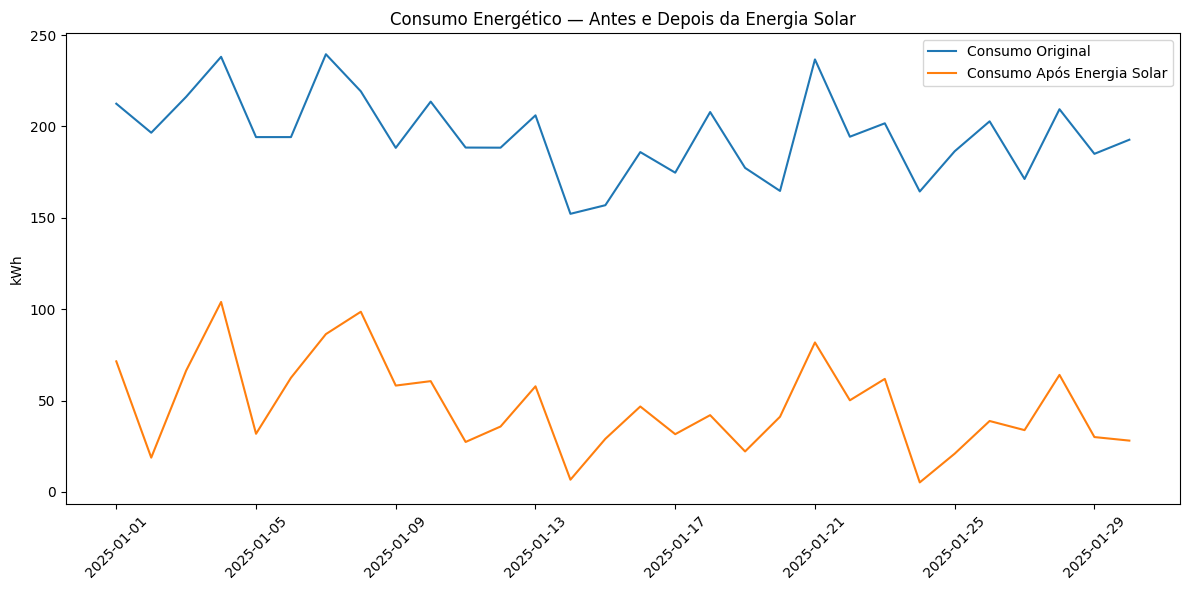

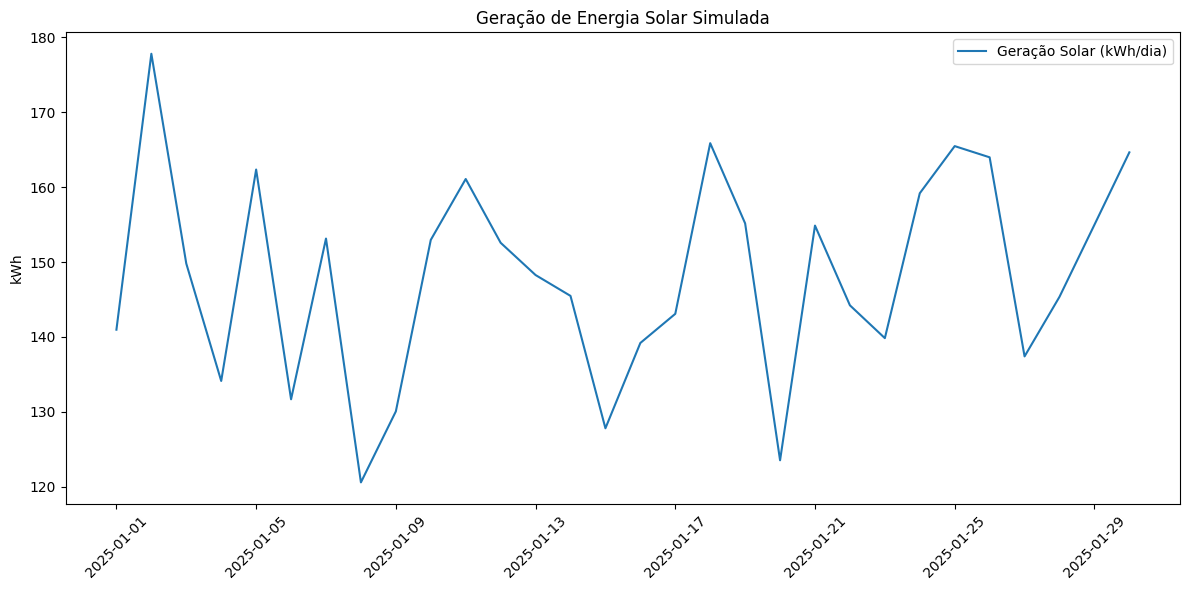

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulação de dados
np.random.seed(42)

dias = pd.date_range(start="2025-01-01", periods=30)

# Consumo simulado (kWh por dia)
# Base: 200 kWh/dia + variações
consumo = 200 + np.random.normal(0, 25, 30)

# Geração solar simulada (kWh por dia)
# No início (antes da adoção) = 0
geracao_solar_zero = np.zeros(30)

df = pd.DataFrame({
    "Dia": dias,
    "Consumo_kWh": consumo,
    "GeracaoSolar_kWh": geracao_solar_zero
})

print("    Dados simulados ")
print(df.head())


# Opção A- Análise de dados

media_consumo = df["Consumo_kWh"].mean()
pico_consumo = df["Consumo_kWh"].max()
dia_pico = df.loc[df["Consumo_kWh"].idxmax(), "Dia"]

print("\n    ANÁLISE — OPÇÃO A ")
print(f"Consumo médio: {media_consumo:.2f} kWh/dia")
print(f"Pico de consumo: {pico_consumo:.2f} kWh no dia {dia_pico.date()}")

# Identificação de desperdício
# Considerando desperdício quando > 15% acima da média
limite_desperdicio = media_consumo * 1.15
df["Desperdicio_kWh"] = df["Consumo_kWh"] - limite_desperdicio
df["Desperdicio_kWh"] = df["Desperdicio_kWh"].apply(lambda x: x if x > 0 else 0)

total_desperdicio = df["Desperdicio_kWh"].sum()

print(f"Desperdício total estimado no mês: {total_desperdicio:.2f} kWh")

# Ajuste sugerido: reduzir desperdício em 40%
ganho_reducao = total_desperdicio * 0.40
print(f"Ganho potencial com ajustes: {ganho_reducao:.2f} kWh/mês")


# Opção C- Simulação de Uso de Energias Renováveis
print("\n    SIMULAÇÃO — OPÇÃO C (Energia Solar) ")

# Geração solar simulada com painéis instalados
# Média de 150 kWh/dia gerados
geracao_solar_nova = 150 + np.random.normal(0, 15, 30)

df["GeracaoSolar_kWh"] = geracao_solar_nova

df["ConsumoLiquido_kWh"] = df["Consumo_kWh"] - df["GeracaoSolar_kWh"]

# Evitar números negativos (exportação à rede)
df["ConsumoLiquido_kWh"] = df["ConsumoLiquido_kWh"].apply(lambda x: x if x > 0 else 0)

economia_total = (df["Consumo_kWh"] - df["ConsumoLiquido_kWh"]).sum()

print(f"Energia economizada após instalação solar: {economia_total:.2f} kWh/mês")


# 4. GRÁFICOS
plt.figure(figsize=(12,6))
plt.plot(df["Dia"], df["Consumo_kWh"], label="Consumo Original")
plt.plot(df["Dia"], df["ConsumoLiquido_kWh"], label="Consumo Após Energia Solar")
plt.legend()
plt.title("Consumo Energético — Antes e Depois da Energia Solar")
plt.ylabel("kWh")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df["Dia"], df["GeracaoSolar_kWh"], label="Geração Solar (kWh/dia)")
plt.title("Geração de Energia Solar Simulada")
plt.ylabel("kWh")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
